# Project Description

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.
Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.
Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 
You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

# Loading the Dataset¶

In [2]:
data=pd.read_csv('Telecom_customer_churn.csv')
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
# checking shapes

data.shape


(7043, 21)

In [4]:
# Observations:

# This Dataset has 7043 rows and 21 columns. Let's study the column's names and their charectaristics.

In [5]:
# checking columns names

data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
# About Columns-

# 1.Customer_ID-This column gives the ID of the customer.

# 2.Gender-This column tells about male/female/other.

# 3.SeniorCitizen-This tells about senior citizenship.

# 4.Partner-This column tells about partner in terms of yes/no

# 5.Dependents-This coulumn tells about whether customer is dependent or not

# 6.Tenure-This column tells about the customer tenure.

# 7.PhoneService-This column tells about the Phone service of the customer

# 8.MultipleLines-This column tells about the muliple lines provided to the customer.

# 9.InternetService-This column tells the type pf internet service provided to the customer

# 10.OnlineSecurity-This column gives the information about the online security.

# 11.OnlineBackup-This column provides the backup online.

# 12.DeviceProtection-This column gives the protection of device.

# 13.TechSupport-This column tells about the technical support.

# 14.StreamingTV-This column gives the details of customer using StreamingTV or not

# 15.StreamingMovies-This column gives the details of streaming movies.

# 16.Contract-This column gives the information about the contract of a customer.

# 17.PaperlessBilling-This column gives the information about paper billing or not.

# 18.PaymentMethod-This column gives the information about payment method used by customer.

# 19.MonthlyCharges-This column tells about the total amount monthly.

# 20.Total Charges-This column tells the total amount to be paid to customer.

# 21.Churn-This column gives the information about Customer churn.
# That is when a customer will stop the business with the company.


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
# Observations:

# Among 21 columns, there are 1 float values, 18 are object types and 2 are int datatype.

# There is one target variable , Churn.

# Churn is a categorical data, needs Classification model to predict this.

In [9]:
data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [10]:
# Observations:

# Here customerID has different value for every different entries. Later we will drop tbis column

# Checking duplicate:

In [13]:
#checking duplicate

data.duplicated().sum()

0

In [14]:
# Observatios:

# This dataset does not have any duplicate value

# Statistical features:

In [15]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [16]:
data.describe(include=object).T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [17]:
# Observations:

# No null values are present.

# Customer ID is unique for every set of data.

# Target variable is Churn and it is a binary categorical data. So the problem is a Classification problem.

# "SeniorCitizen" is a categorical variable as it has two different value, 0 and 1. 
#Let's convert it into object datatype.

In [18]:
data['SeniorCitizen']=data['SeniorCitizen'].astype(object)

# Let check if any whitespace, 'NA' or '-' exist in dataset

In [19]:
data.isin([' ','NA','-']).sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [20]:
data['TotalCharges']= data['TotalCharges'].replace(' ',np.nan)

In [21]:
data['TotalCharges'].isin([' ','NA','-']).sum()

0

In [22]:
# Converting object datatype into float

data['TotalCharges']= data['TotalCharges'].astype(float)

In [23]:
data['TotalCharges'].isna().sum()

11

In [24]:
# Observations:

# Replaced ' ' with np.NaN

# No blank space, NA, '-', '?' exist in dataset.

# Checking Null:

In [25]:
#checking null values

null_val= data.isna().sum()
null_val_per =(null_val/data.shape[0])*100
l= [null_val, null_val_per]
print("missing value details \n\n", pd.concat(l, axis =1, keys =['Null Values', 'Null Values percentage']).sort_values('Null Values'))

missing value details 

                   Null Values  Null Values percentage
customerID                  0                0.000000
MonthlyCharges              0                0.000000
PaymentMethod               0                0.000000
PaperlessBilling            0                0.000000
Contract                    0                0.000000
StreamingMovies             0                0.000000
StreamingTV                 0                0.000000
TechSupport                 0                0.000000
DeviceProtection            0                0.000000
OnlineBackup                0                0.000000
InternetService             0                0.000000
MultipleLines               0                0.000000
PhoneService                0                0.000000
tenure                      0                0.000000
Dependents                  0                0.000000
Partner                     0                0.000000
SeniorCitizen               0                0.000000
gen

<AxesSubplot:>

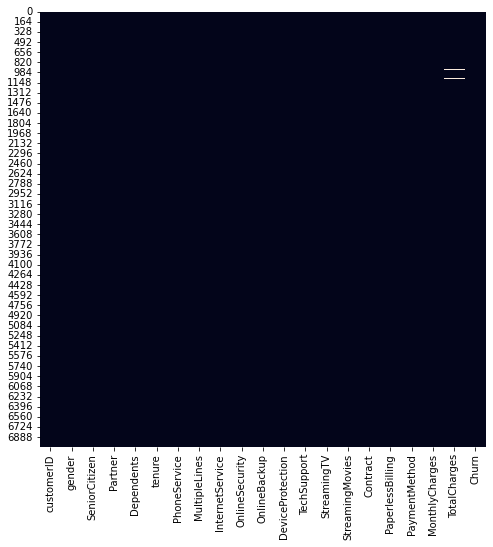

In [26]:
plt.figure(figsize=(8,8))
sns.heatmap(data.isnull(),cbar=False)

In [27]:
# Observations:

# Null values are present in the totalcharges column of the dataset.

# Null value imputation:

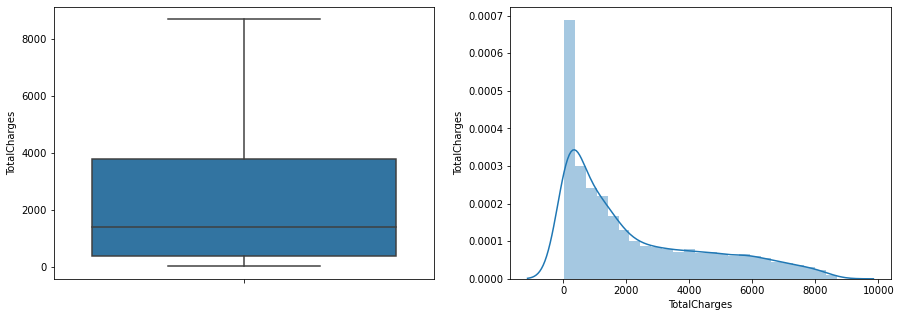

In [28]:
f,ax=plt.subplots(1,2,figsize=(15,5))
sns.boxplot(y = 'TotalCharges', data= data,ax=ax[0])
plt.ylabel('TotalCharges')
sns.distplot(data['TotalCharges'] ,ax=ax[1])
plt.xlabel('TotalCharges')
plt.show()

In [29]:
print("Mean of TotalCharges:",data['TotalCharges'].mean())
print("Median of TotalCharges:",data['TotalCharges'].median())

Mean of TotalCharges: 2283.3004408418697
Median of TotalCharges: 1397.475


In [30]:
# Observation:

# Outliers doesnot exist and 'TotalCharges' feature is right skewed. Let's impute missing value with Mean.

# Imputation of Missing value in TotalCharges with Mean:

In [31]:
data['TotalCharges']=data['TotalCharges'].fillna(data['TotalCharges'].mean())

# Drop the unnecessary column

In [32]:
data.drop(['customerID'],axis=1,inplace=True)

# Differentiate Numarical and Categorical Data:

In [34]:
# spliting into Numerical & Categorical 
num_features = ['tenure','MonthlyCharges', 'TotalCharges']

cat_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

# Exploratory Data Analysis(EDA):

# Univariate Analysis

In [35]:
for i in cat_features:
    x= data[i].value_counts()
    print("Value counts of", i, "is---\n",x)
    print("="*20)

Value counts of gender is---
 Male      3555
Female    3488
Name: gender, dtype: int64
Value counts of SeniorCitizen is---
 0    5901
1    1142
Name: SeniorCitizen, dtype: int64
Value counts of Partner is---
 No     3641
Yes    3402
Name: Partner, dtype: int64
Value counts of Dependents is---
 No     4933
Yes    2110
Name: Dependents, dtype: int64
Value counts of PhoneService is---
 Yes    6361
No      682
Name: PhoneService, dtype: int64
Value counts of MultipleLines is---
 No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
Value counts of InternetService is---
 Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
Value counts of OnlineSecurity is---
 No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
Value counts of OnlineBackup is---
 No                     3088
Yes                    2429
No internet service    1526

Male      3555
Female    3488
Name: gender, dtype: int64


<AxesSubplot:xlabel='gender', ylabel='count'>

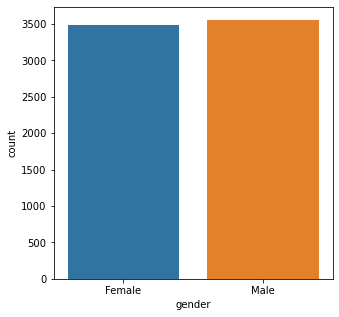

In [36]:
#countplot for 'gender' column
print(data['gender'].value_counts())
plt.figure(figsize=(5,5))
sns.countplot('gender',data=data)

In [37]:
# As we can see Male(Total no=3555) are more compared to female(total no=3488)

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

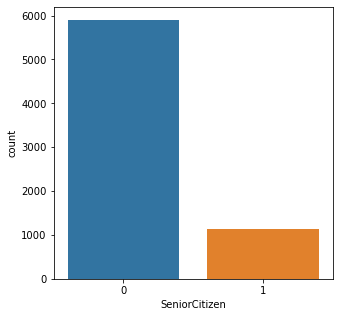

In [38]:
#countplot for 'SeniorCitizen' column
print(data['SeniorCitizen'].value_counts())
plt.figure(figsize=(5,5))
sns.countplot('SeniorCitizen',data=data)

In [39]:
# SeniorCitizen are less(Total no=1142) and not SeniorCitizen are more(total no=5901)

No     3641
Yes    3402
Name: Partner, dtype: int64


<AxesSubplot:xlabel='Partner', ylabel='count'>

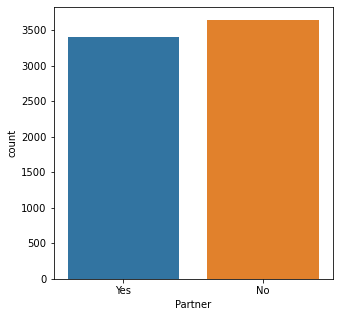

In [40]:
#countplot for 'Partner' column
print(data['Partner'].value_counts())
plt.figure(figsize=(5,5))
sns.countplot('Partner',data=data)

In [41]:
# Partner are less(total no=3402) and not having Partner are more(total no=3641)

No     4933
Yes    2110
Name: Dependents, dtype: int64


<AxesSubplot:xlabel='Dependents', ylabel='count'>

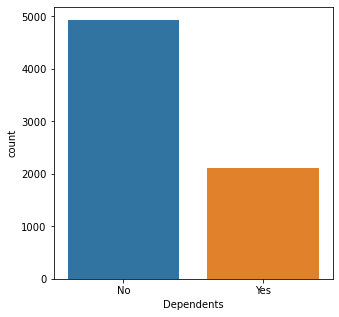

In [42]:
#countplot for 'Dependents' column
print(data['Dependents'].value_counts())
plt.figure(figsize=(5,5))
sns.countplot('Dependents',data=data)

In [43]:
# Dependents are less(total no=2110) and not having Dependents are more (toal no=4933)

Yes    6361
No      682
Name: PhoneService, dtype: int64


<AxesSubplot:xlabel='PhoneService', ylabel='count'>

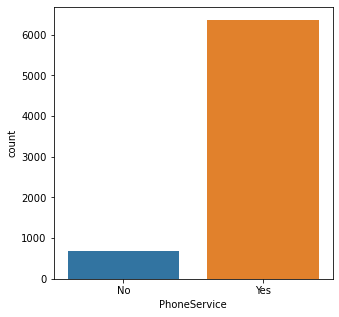

In [44]:
#countplot for 'PhoneService' column
print(data['PhoneService'].value_counts())
plt.figure(figsize=(5,5))
sns.countplot('PhoneService',data=data)

In [45]:
# PhoneService are more(total no=6361) and not having PhoneService are less (total no=682)

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

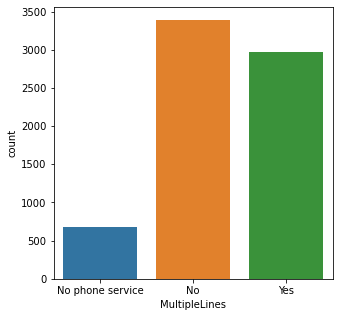

In [46]:
#countplot for 'MultipleLines' column
print(data['MultipleLines'].value_counts())
plt.figure(figsize=(5,5))
sns.countplot('MultipleLines',data=data)

In [47]:
# Not having 'MultipleLines' is more (total no=3390) compared to having 'MultipleLines'(total no=2971)
# Having 'NoPhoneService' is least(totla no=682)

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


<AxesSubplot:xlabel='InternetService', ylabel='count'>

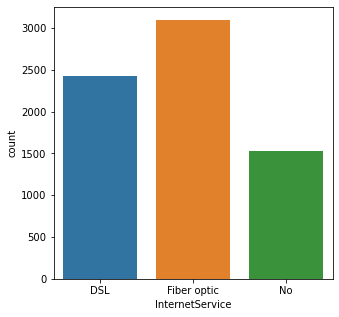

In [48]:
#countplot for 'InternetService' column
print(data['InternetService'].value_counts())
plt.figure(figsize=(5,5))
sns.countplot('InternetService',data=data)

In [49]:
# Fibre Optic customers are more (3096), then is DSL service (2421) and the least is no internet service (1526)

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

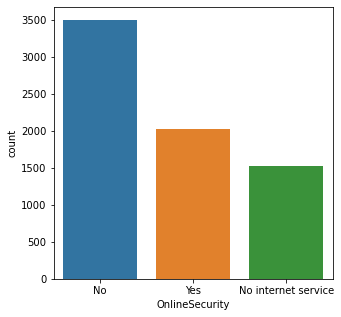

In [50]:
#countplot for 'OnlineSecurity' column
print(data['OnlineSecurity'].value_counts())
plt.figure(figsize=(5,5))
sns.countplot('OnlineSecurity',data=data)

In [51]:
# Not having OnlineSecurity' is more(Total no=3498) compare to having OnlineSecurity(total no=2019) 
#Having 'No Internet service' is least (Total No=1526)

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

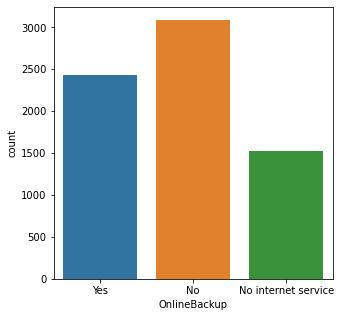

In [53]:
#countplot for 'OnlineBackup' column
print(data['OnlineBackup'].value_counts())
plt.figure(figsize=(5,5))
sns.countplot('OnlineBackup',data=data)

In [54]:
# Not having 'OnlineBackup'is more (total no=3088)compare to having 'OnlineBackup'(total no=2429)
# Having 'No Internet Service' is least (total no=1526)

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

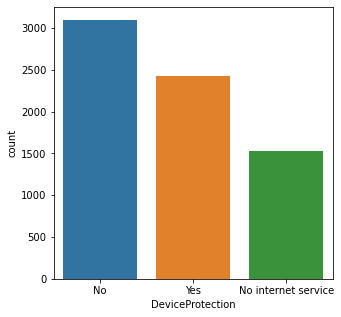

In [55]:
#countplot for 'DeviceProtection' column
print(data['DeviceProtection'].value_counts())
plt.figure(figsize=(5,5))
sns.countplot('DeviceProtection',data=data)

In [56]:
# Not having 'DeviceProtection' is more (Total no=3095)compared to having 'DeviceProtection'(total no=2422)
# Having 'NoInternetService' is least (total no=1526)

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


<AxesSubplot:xlabel='TechSupport', ylabel='count'>

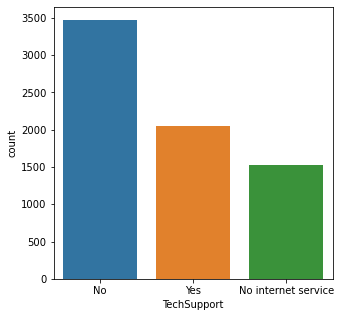

In [57]:
#countplot for 'TechSupport' column
print(data['TechSupport'].value_counts())
plt.figure(figsize=(5,5))
sns.countplot('TechSupport',data=data)

In [58]:
# Not having 'TechSupport' are more(total no=3473) compare to having 'TechSupport'(total no=2044).
# Having 'NoInternetService' is least (Total no=1526)

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

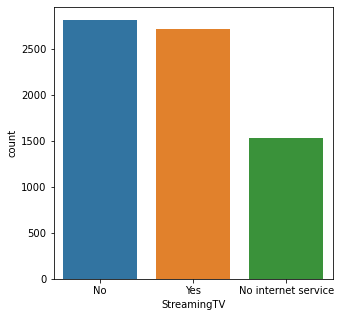

In [59]:
#countplot for 'StreamingTV' column
print(data['StreamingTV'].value_counts())
plt.figure(figsize=(5,5))
sns.countplot('StreamingTV',data=data)

In [60]:
# Not having 'StreamingTV' are more (total no=2810)compare to having 'StreamingTV'(totalno=2707)

# Having 'NoInternetService' is least (total no=1526)


No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

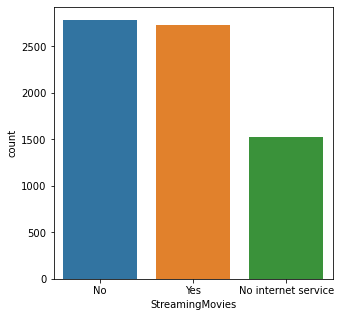

In [61]:
#countplot for 'StreamingMovies' column
print(data['StreamingMovies'].value_counts())
plt.figure(figsize=(5,5))
sns.countplot('StreamingMovies',data=data)

In [62]:
# Not having 'StreamingMovies'are more(total no=2785) compare to having 'StreamingMovies'(Total no=2732).

# Having 'NoInternetService'is at least(total no=1526)

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


<AxesSubplot:xlabel='Contract', ylabel='count'>

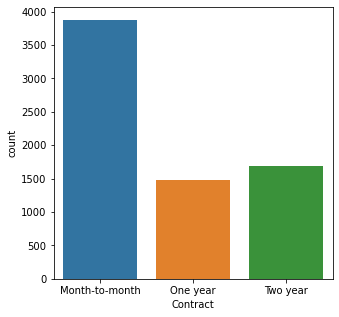

In [63]:
#countplot for 'Contract' column
print(data['Contract'].value_counts())
plt.figure(figsize=(5,5))
sns.countplot('Contract',data=data)

In [64]:
# 'Contract' done with customers for month-to-month is more (total no=3875) and done for one year is less(total no=1473)

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

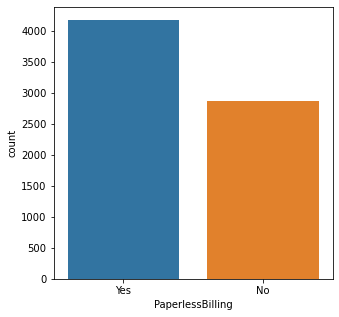

In [65]:
#countplot for 'PaperlessBilling' column
print(data['PaperlessBilling'].value_counts())
plt.figure(figsize=(5,5))
sns.countplot('PaperlessBilling',data=data)

In [66]:
# PaperlessBilling are done more(total no=4171) compare to paper billing total no=2872)

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

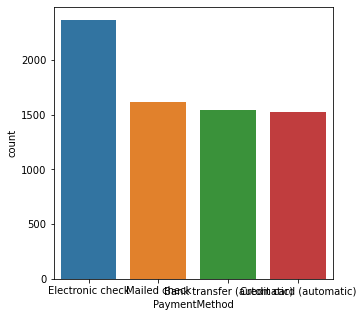

In [67]:
#countplot for 'PaymentMethod' column
print(data['PaymentMethod'].value_counts())
plt.figure(figsize=(5,5))
sns.countplot('PaymentMethod',data=data)

In [68]:
#PaymentMethod 'Electronic check' is used more (Total no=2365) and 'credit card'(automatic)is used less(total no=1522)

# 'Mailed check'(total no=1612) and 'Bank transfer(automatic)'(total no=1544)is also used as PaymentMethod
#but less than 'Electronic check' and more than 'Credit card'

No     5174
Yes    1869
Name: Churn, dtype: int64


<AxesSubplot:xlabel='Churn', ylabel='count'>

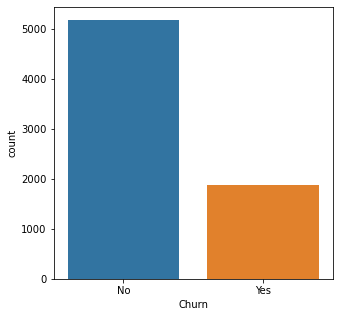

In [69]:
#countplot for 'Churn' column
print(data['Churn'].value_counts())
plt.figure(figsize=(5,5))
sns.countplot('Churn',data=data)

In [70]:
# Churn are less (total no=1869) and not having churn are more(total no=5174).

# It shows 1869 number of customers no longer want to purchase goods and services from the business.

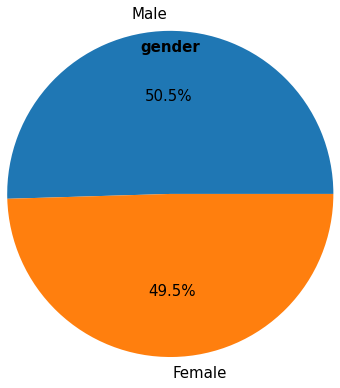

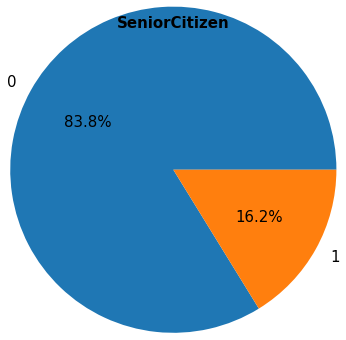

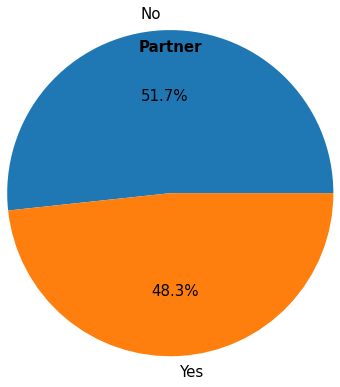

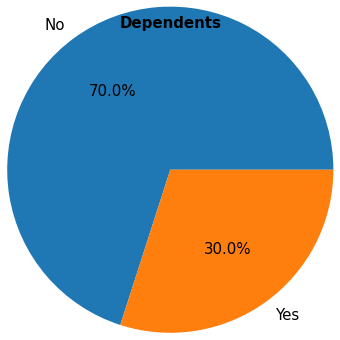

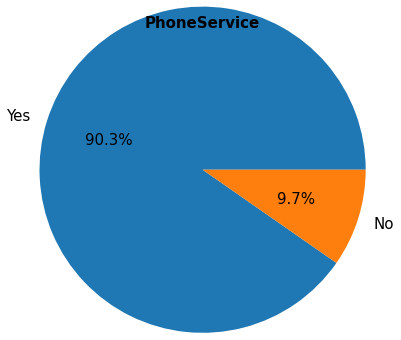

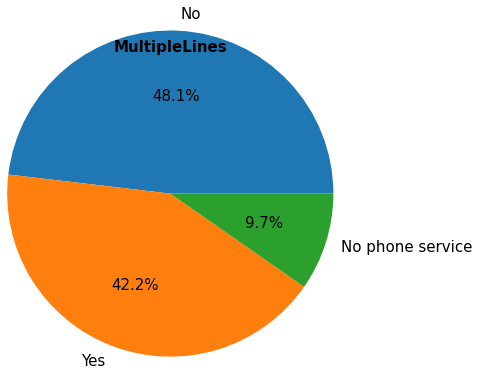

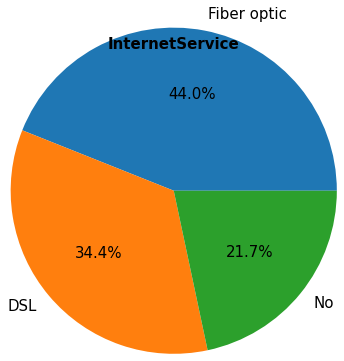

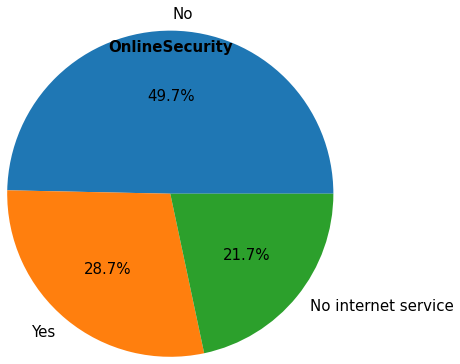

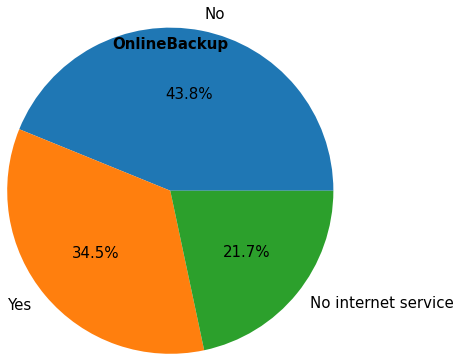

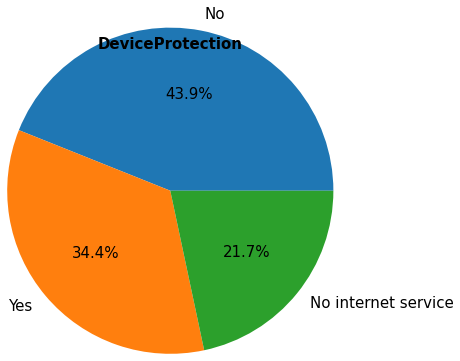

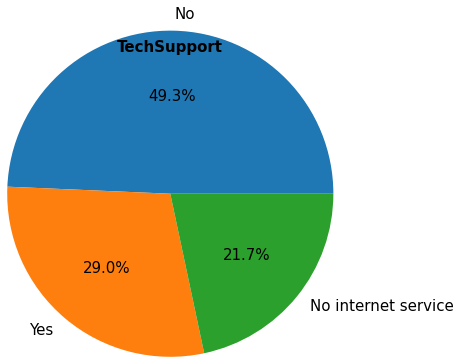

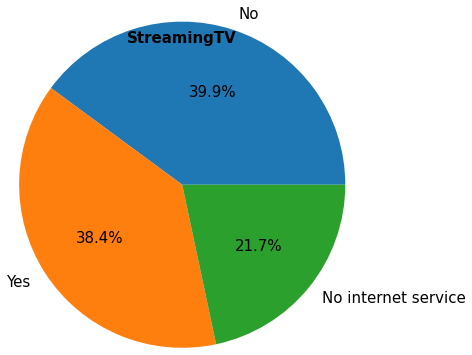

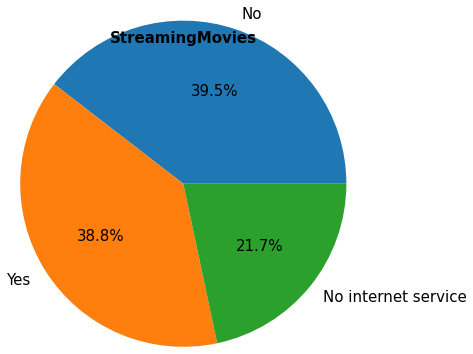

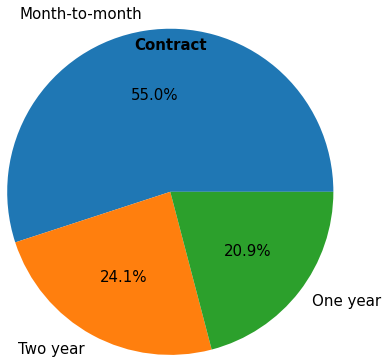

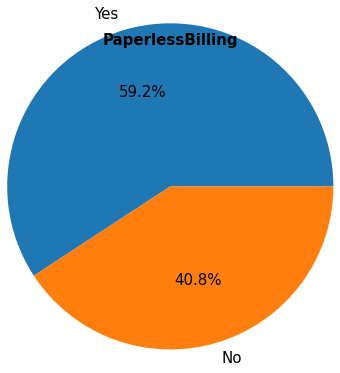

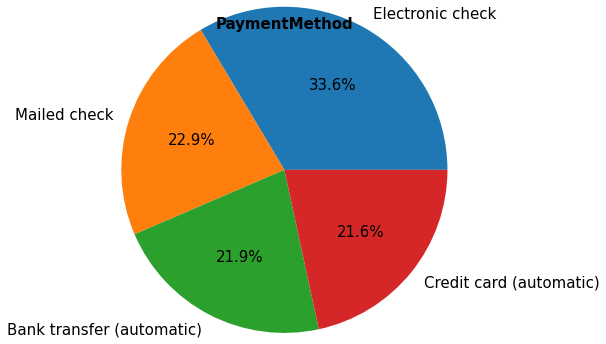

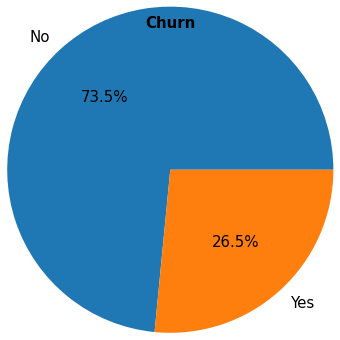

In [71]:
for i in cat_features:
    plt.figure(figsize=(5,5))
    data[i].value_counts().plot.pie(radius =1.5, textprops ={ 'fontsize':15}, autopct='%2.1f%%')
    plt.title(i,fontsize =15,fontweight ='bold')
    plt.ylabel(' ')
    plt.show()

In [72]:
# Overall Observation

# 1. Around 16% customer are Senior citizen

# 2. Around 50% customer are having partners.

# 3. Around 30% customer have dependents on them

# 4. Almost 55% customer perfer month to month contract compare to other.

# 5. 60% Customer perfer paperless billing.

# 6. Most used payment method is electronic check.

# 7. The distribution of target variable is quite imbalance as there is a 75:25 
#relationship between NO:YES of tendency of churn.



# Analysis of Numarical variable:

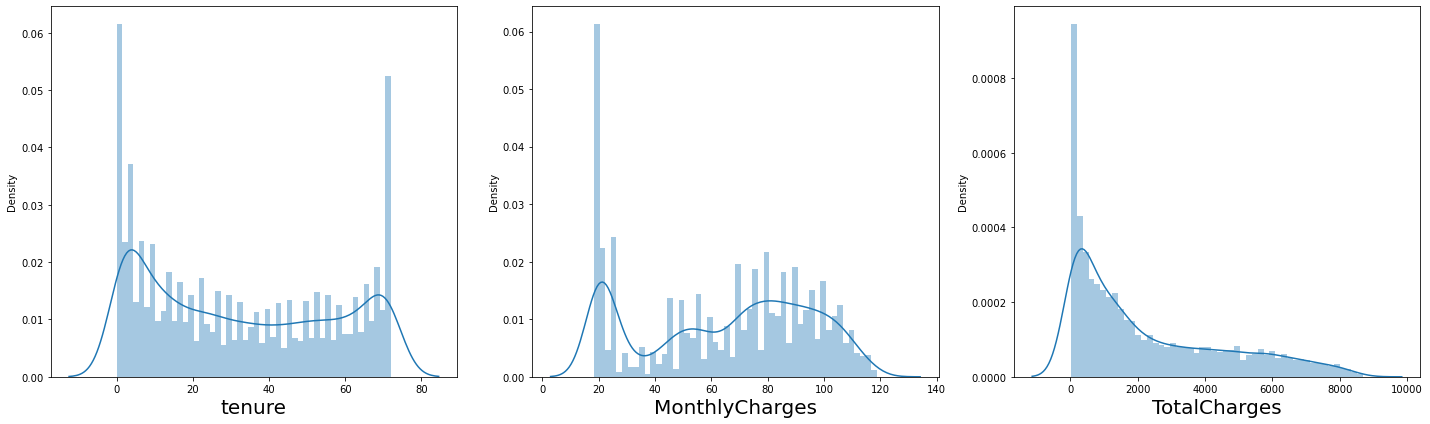

In [73]:
i=0
plt.figure(figsize=(20,6))
for p in num_features:
    plt.subplot(1,3,i+1)
    sns.distplot(data[p], bins=50)
    plt.xlabel(p,fontsize=20)
    i+=1  
plt.tight_layout()

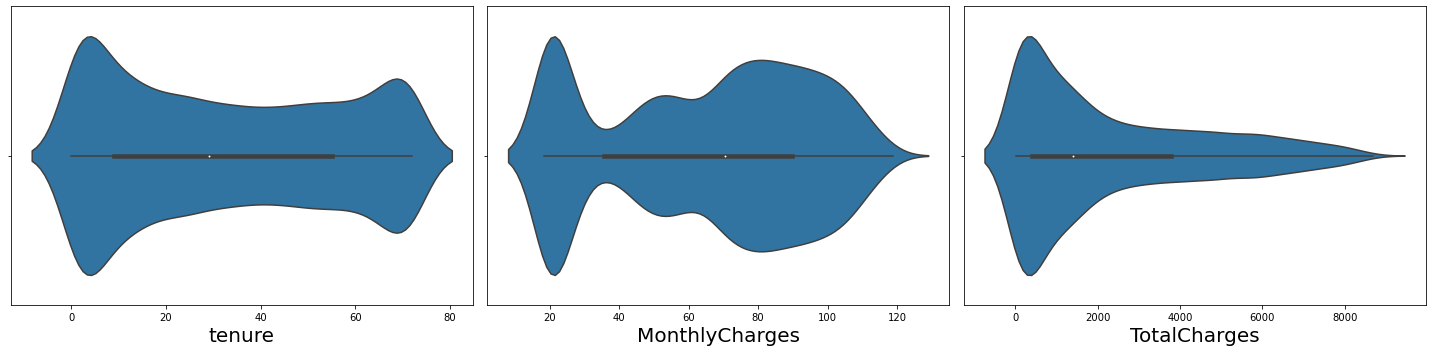

In [74]:
i=0
plt.figure(figsize=(20,5))
for p in num_features:
    plt.subplot(1,3,i+1)
    sns.violinplot(data[p])
    plt.xlabel(p,fontsize=20)
    i+=1 
plt.tight_layout()
plt.show()

In [75]:
# Observations:

# 1. Avg range of age is 0-70.

# 2. Monthly charges range is 20-120

# 3. 0 value is present in TotalCharges column.

# 4. All the data have right skewness

# Analysis of Target variable:

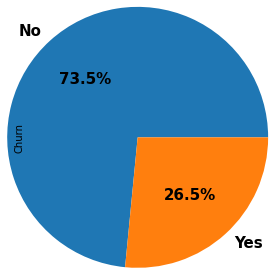

In [76]:
data['Churn'].value_counts().plot.pie(radius =1.5, textprops ={ 'fontsize':15,'fontweight' :'bold'},
                                       autopct='%2.1f%%')
plt.show()

In [77]:
# Observation :

# 73.5 % customers are not choose to Churn the service in last month.

# 26.5 % customers are choose to Churn the service in last month.

# Different feature's impact on target variable:

# Bivariate Analysis:

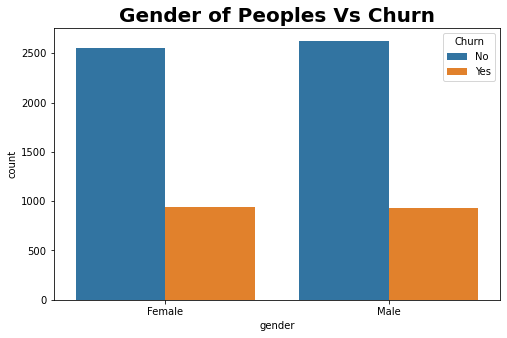

In [130]:
#  gender on Churn:

plt.figure(figsize=(8,5))
sns.countplot(data['gender'], hue= data['Churn'])
plt.title('Gender of Peoples Vs Churn', fontsize=20, fontweight='bold')
plt.show()

In [131]:
pd.crosstab(data['Churn'],data["gender"], margins= True)

gender,Female,Male,All
Churn,,,
No,2549,2625,5174
Yes,939,930,1869
All,3488,3555,7043


In [132]:
# Observations:

# In terms of gender, the distribution of Churn is in same proportion with minor difference.

# For Male, YES: NO= 26:74 and for Female, YES: NO= 27:73

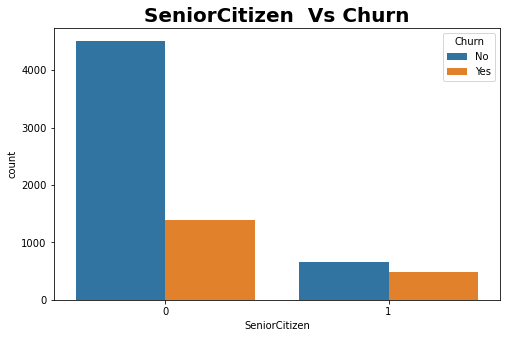

In [133]:
#  SeniorCitizen on Churn:

plt.figure(figsize=(8,5))
sns.countplot(data['SeniorCitizen'], hue= data['Churn'])
plt.title('SeniorCitizen  Vs Churn', fontsize=20, fontweight='bold')
plt.show()

In [134]:
pd.crosstab(data["SeniorCitizen"],data['Churn'], margins= True)

Churn,No,Yes,All
SeniorCitizen,,,
0,4508,1393,5901
1,666,476,1142
All,5174,1869,7043


In [135]:
pd.crosstab([data.gender,data.SeniorCitizen ],data["Churn"],margins=True)

Churn                   No   Yes   All
gender SeniorCitizen                  
Female 0              2221   699  2920
       1               328   240   568
Male   0              2287   694  2981
       1               338   236   574
All                   5174  1869  7043

In [136]:
# Observations:

# Senior citizen have more tendency to churn with respect to others.

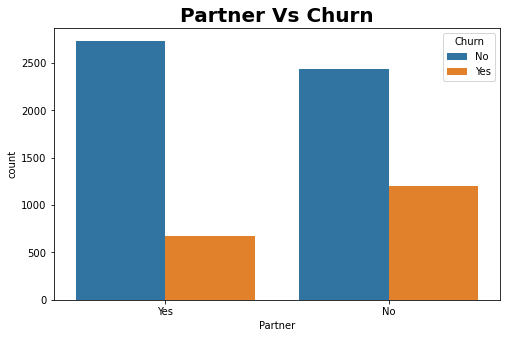

In [137]:
#  Partner Vs Churn:

plt.figure(figsize=(8,5))
sns.countplot(data['Partner'], hue= data['Churn'])
plt.title('Partner Vs Churn', fontsize=20, fontweight='bold')
plt.show()

In [138]:
pd.crosstab([data.gender,data.Partner],data["Churn"],margins=True)

Churn             No   Yes   All
gender Partner                  
Female No       1180   620  1800
       Yes      1369   319  1688
Male   No       1261   580  1841
       Yes      1364   350  1714
All             5174  1869  7043

In [139]:
# Observations:

# Customer having Partner have less tendency to Churn.

# The customer not having partner have more tendency to Churn with respect to the customer who have their partner.

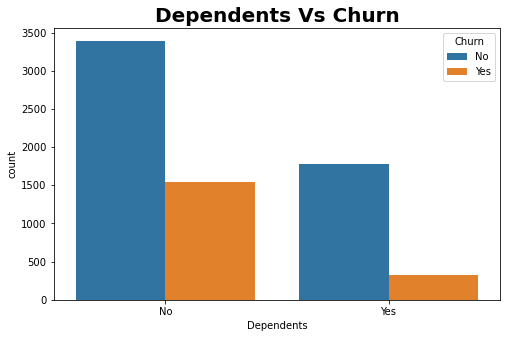

In [140]:
#  Dependents Vs Churn:

plt.figure(figsize=(8,5))
sns.countplot(data['Dependents'], hue= data['Churn'])
plt.title('Dependents Vs Churn', fontsize=20, fontweight='bold')
plt.show()

In [141]:
pd.crosstab([data.Dependents],data["Churn"],margins=True)

Churn,No,Yes,All
Dependents,,,
No,3390,1543,4933
Yes,1784,326,2110
All,5174,1869,7043


In [142]:
# Observations:

# Only around 30% customers who have no dependents are tendency to Churn.

# For all dependent customers around 85 % customers are more tendency to Churn.

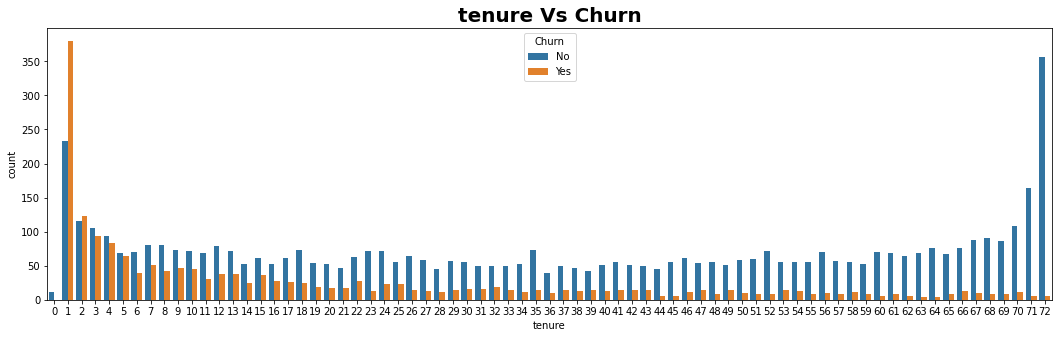

In [143]:
# tenure Vs Churn:

plt.figure(figsize=(18,5))
sns.countplot(data['tenure'], hue= data['Churn'])
plt.title('tenure Vs Churn', fontsize=20, fontweight='bold')
plt.show()

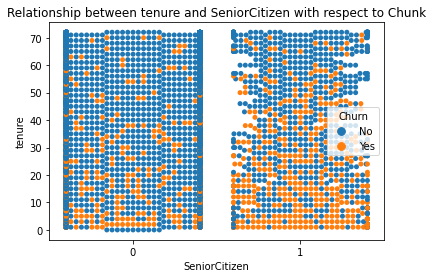

In [144]:
plt.title("Relationship between tenure and SeniorCitizen with respect to Chunk")
sns.swarmplot(x = "SeniorCitizen",y="tenure",data = data, hue= "Churn")
plt.show()

In [145]:
# Observations:

# Here for the tenure 1, the number of customer with the tendency to Churn is much greater than the number of customer who have no tendency to Churn.

# There is no clear relationship between SeniorCitizen and tenure.

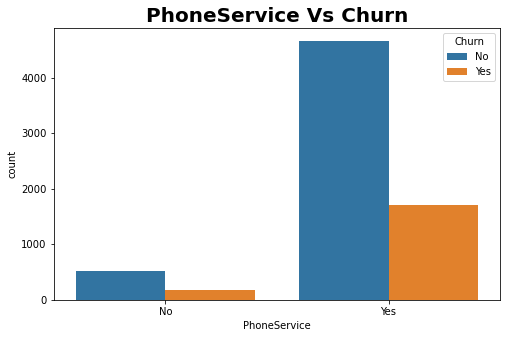

In [146]:
#  PhoneService Vs Churn:

plt.figure(figsize=(8,5))
sns.countplot(data['PhoneService'], hue= data['Churn'])
plt.title('PhoneService Vs Churn', fontsize=20, fontweight='bold')
plt.show()

In [147]:
pd.crosstab([data.PhoneService],data["Churn"],margins=True)

Churn,No,Yes,All
PhoneService,,,
No,512,170,682
Yes,4662,1699,6361
All,5174,1869,7043


In [148]:
# Observations:

# There is no such relationship between PhoneService and churn

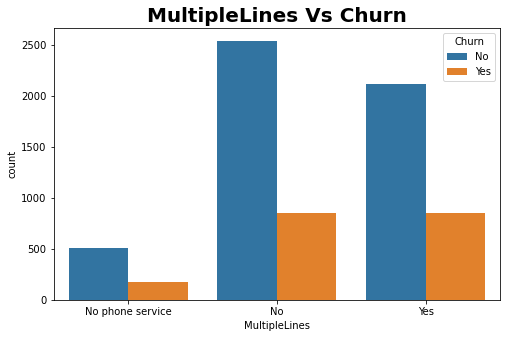

In [149]:
# MultipleLines Vs Churn:

plt.figure(figsize=(8,5))
sns.countplot(data['MultipleLines'], hue= data['Churn'])
plt.title('MultipleLines Vs Churn', fontsize=20, fontweight='bold')
plt.show()


In [150]:
pd.crosstab([data.MultipleLines],data["Churn"],margins=True)

Churn,No,Yes,All
MultipleLines,,,
No,2541,849,3390
No phone service,512,170,682
Yes,2121,850,2971
All,5174,1869,7043


In [151]:
# Observations:

# No such relation is found from above graph.


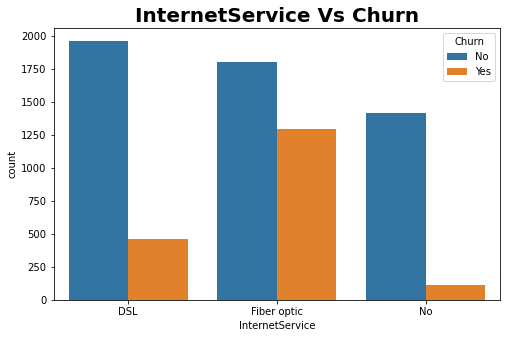

In [152]:
#  InternetService Vs Churn:

plt.figure(figsize=(8,5))
sns.countplot(data['InternetService'], hue= data['Churn'])
plt.title('InternetService Vs Churn', fontsize=20, fontweight='bold')
plt.show()

In [153]:
pd.crosstab([data.InternetService],data["Churn"],margins=True)

Churn,No,Yes,All
InternetService,,,
DSL,1962,459,2421
Fiber optic,1799,1297,3096
No,1413,113,1526
All,5174,1869,7043


In [154]:
# Observations:

# Mainly the positive Chunk are in the category with Fiber optic connection of internet service.

# Out of total 3096 Fiber Optic connection, 1297 customer have tendency to Churn.


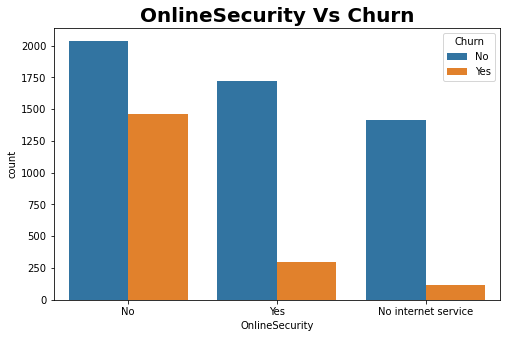

In [155]:
#  OnlineSecurity Vs Churn:

plt.figure(figsize=(8,5))
sns.countplot(data['OnlineSecurity'], hue= data['Churn'])
plt.title('OnlineSecurity Vs Churn', fontsize=20, fontweight='bold')
plt.show()

In [156]:
# Observations:

# The maximum customer who have tendency to Chunk are with No Online Security.


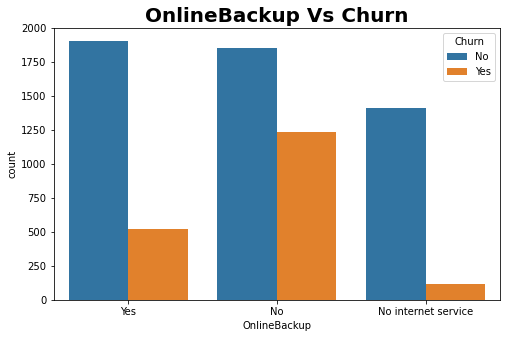

In [157]:
#  OnlineBackup Vs Churn:

plt.figure(figsize=(8,5))
sns.countplot(data['OnlineBackup'], hue= data['Churn'])
plt.title('OnlineBackup Vs Churn', fontsize=20, fontweight='bold')
plt.show()


In [158]:
# The tendency of churn increased if the customer have no Online Backup. It is quite Obvious!!


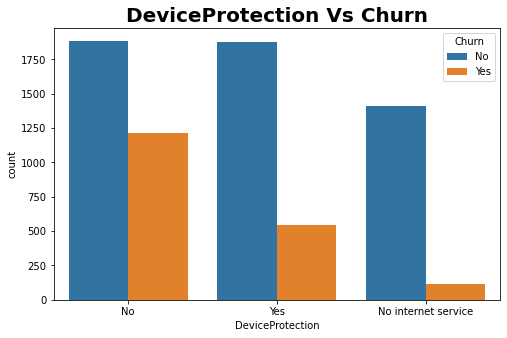

In [159]:
#  DeviceProtection Vs Churn:

plt.figure(figsize=(8,5))
sns.countplot(data['DeviceProtection'], hue= data['Churn'])
plt.title('DeviceProtection Vs Churn', fontsize=20, fontweight='bold')
plt.show()


In [160]:
# Observations:

# The customer with no device protection is more tendency to churn


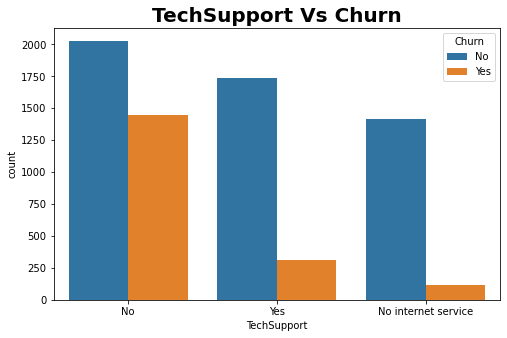

In [161]:
#  TechSupport Vs Churn:

plt.figure(figsize=(8,5))
sns.countplot(data['TechSupport'], hue= data['Churn'])
plt.title('TechSupport Vs Churn', fontsize=20, fontweight='bold')
plt.show()


In [162]:
# Observations:

# The customer with no tech support(just like device protection) is more tendency to churn

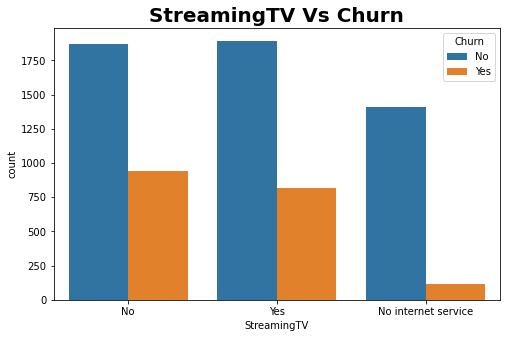

In [163]:
#  StreamingTV Vs Churn:

plt.figure(figsize=(8,5))
sns.countplot(data['StreamingTV'], hue= data['Churn'])
plt.title('StreamingTV Vs Churn', fontsize=20, fontweight='bold')
plt.show()


In [164]:
# Observations:

# Churn tendency in people who streamingTV or not are same.

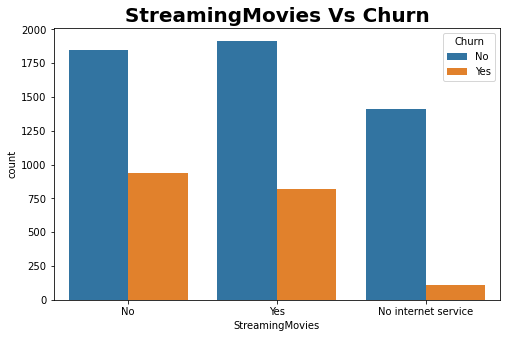

In [165]:
#  StreamingMovies Vs Churn:

plt.figure(figsize=(8,5))
sns.countplot(data['StreamingMovies'], hue= data['Churn'])
plt.title('StreamingMovies Vs Churn', fontsize=20, fontweight='bold')
plt.show()


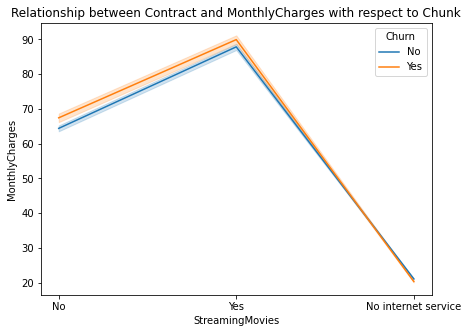

In [166]:
plt.figure(figsize=(7,5))
sns.lineplot(x="StreamingMovies", y='MonthlyCharges',data=data,hue="Churn")
plt.title("Relationship between Contract and MonthlyCharges with respect to Chunk")
plt.show()

In [167]:
# Observations:

# Almost same churn tendency in people streaming Movies or not.


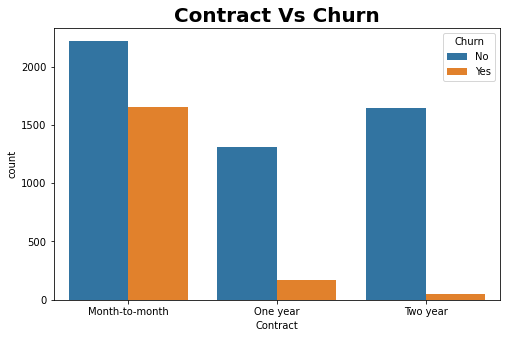

In [168]:
#  Contract Vs Churn:

plt.figure(figsize=(8,5))
sns.countplot(data['Contract'], hue= data['Churn'])
plt.title('Contract Vs Churn', fontsize=20, fontweight='bold')
plt.show()

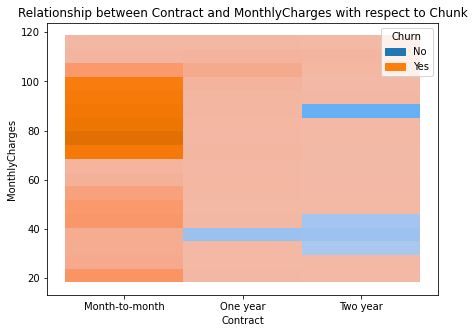

In [169]:
plt.figure(figsize=(7,5))
sns.histplot(x="Contract", y='MonthlyCharges',data=data,hue="Churn")
plt.title("Relationship between Contract and MonthlyCharges with respect to Chunk")
plt.show()

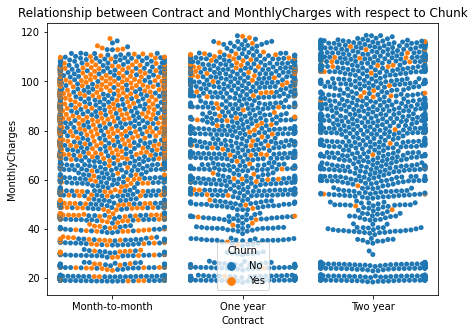

In [170]:
plt.figure(figsize=(7,5))
sns.swarmplot(x="Contract", y='MonthlyCharges',data=data,hue="Churn")
plt.title("Relationship between Contract and MonthlyCharges with respect to Chunk")
plt.show()

In [171]:
# Observations:

# If the contract type is month to month, there is a high churn rate in the customer.

# No relation is found between MonthlyCharges and Contract.

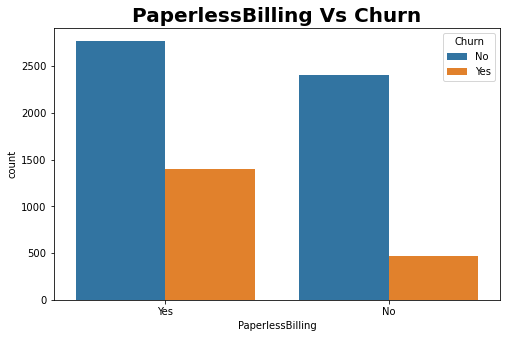

In [172]:
#  PaperlessBilling Vs Churn:

plt.figure(figsize=(8,5))
sns.countplot(data['PaperlessBilling'], hue= data['Churn'])
plt.title('PaperlessBilling Vs Churn', fontsize=20, fontweight='bold')
plt.show()

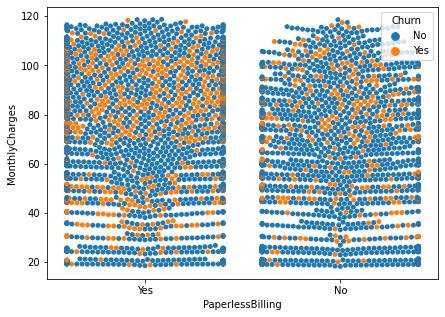

In [173]:
plt.figure(figsize=(7,5))
sns.swarmplot(x="PaperlessBilling", y='MonthlyCharges',data=data,hue="Churn")
plt.show()

In [174]:
# Observations:

# The customers who prefer paperless billing they have high rate to churn.

# No relation is found between MonthlyCharges and PaperlessBilling.

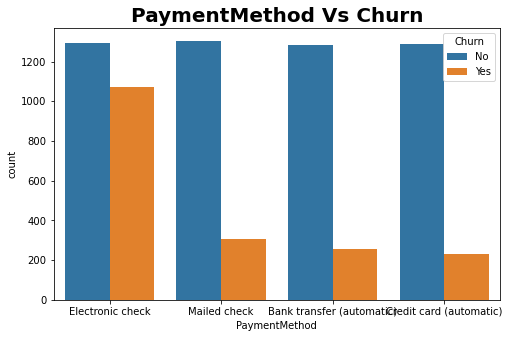

In [175]:
#  PaymentMethod Vs Churn:

plt.figure(figsize=(8,5))
sns.countplot(data['PaymentMethod'], hue= data['Churn'])
plt.title('PaymentMethod Vs Churn', fontsize=20, fontweight='bold')
plt.show()

In [176]:
# Observations:

# There is a high churn tendency in customer whose payment method is Electronic check.

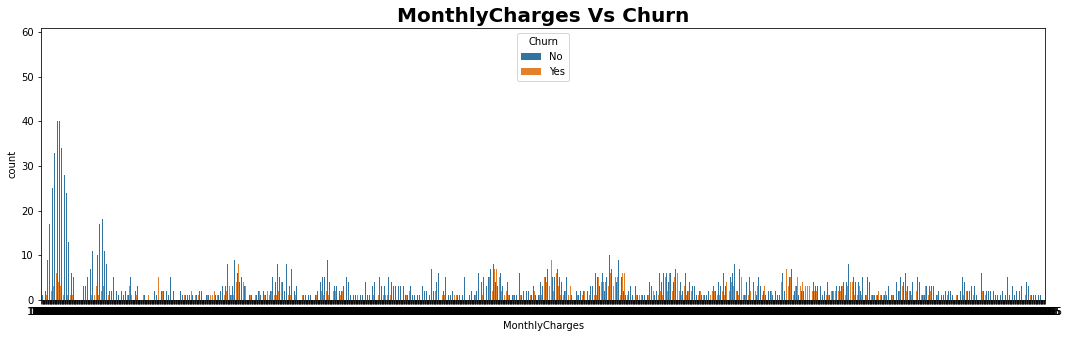

In [177]:
#  MonthlyCharges Vs Churn:

plt.figure(figsize=(18,5))
sns.countplot(data['MonthlyCharges'], hue= data['Churn'])
plt.title('MonthlyCharges Vs Churn', fontsize=20, fontweight='bold')
plt.show()


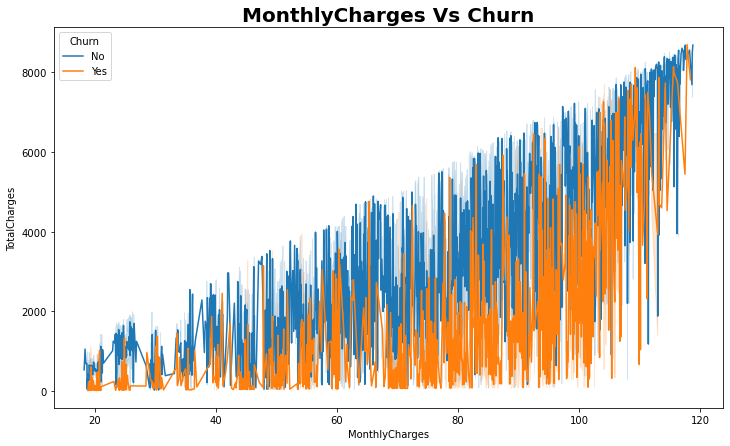

In [178]:
#  TotalCharges Vs Churn:

plt.figure(figsize=(12,7))
sns.lineplot(y="TotalCharges", x='MonthlyCharges',data=data,hue="Churn")
plt.title('MonthlyCharges Vs Churn', fontsize=20, fontweight='bold')
plt.show()

In [179]:
# Observations:

# If MonthlyCharges is high, then the customers are more tendence to choose churn compare to rest.

# Also if TotalCharges is high, then the customers are more tendence to choose churn compare to rest.

# Multivariate Analysis

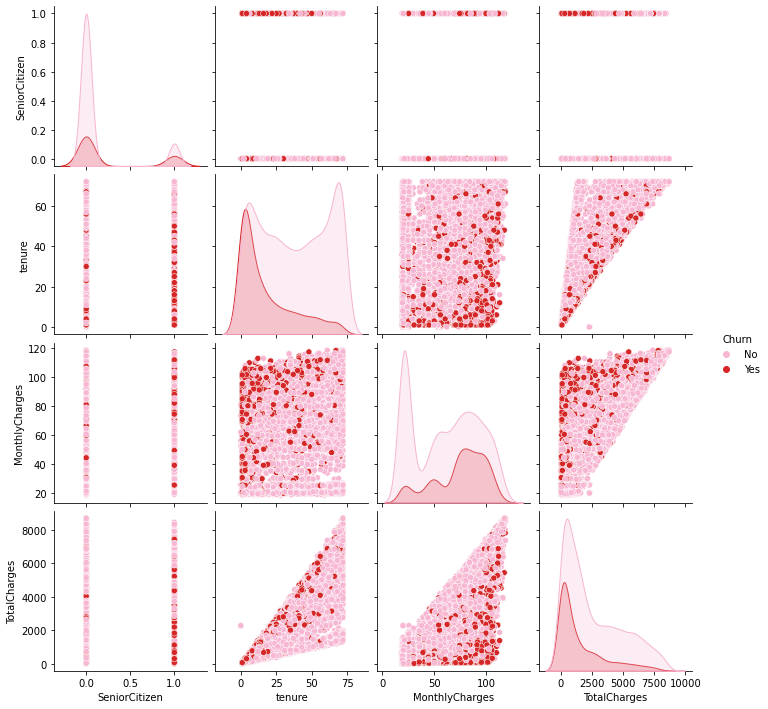

In [180]:
sns.pairplot(data,hue="Churn",palette="tab20_r")
plt.show()

In [181]:
# Observation:

# No special relationships found from the above pairplot

# Correlation:

In [182]:
data.corr().T

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.247900,0.824757
MonthlyCharges,0.247900,1.000000,0.650468
TotalCharges,0.824757,0.650468,1.000000


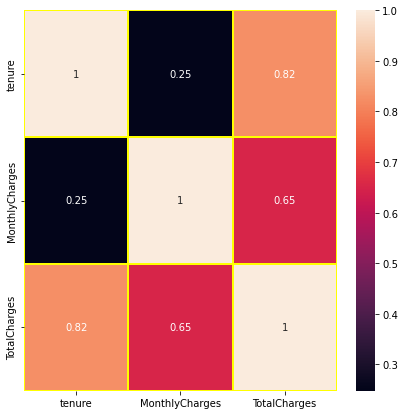

In [183]:
plt.subplots(figsize=(7,7))
sns.heatmap(data.corr(), annot= True, linecolor= "yellow",  linewidths= 2)
plt.show()

In [184]:
# observations:

# Correlation is high between total charges and tenure

#  But as we have only 3 numerical features at this time, let's encode the categorical features.

# Encoding for categorical features:

# Using label encoder:

In [185]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [186]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cat_features:
    data[i] = le.fit_transform(data[i])
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


# Correlation after encoding:

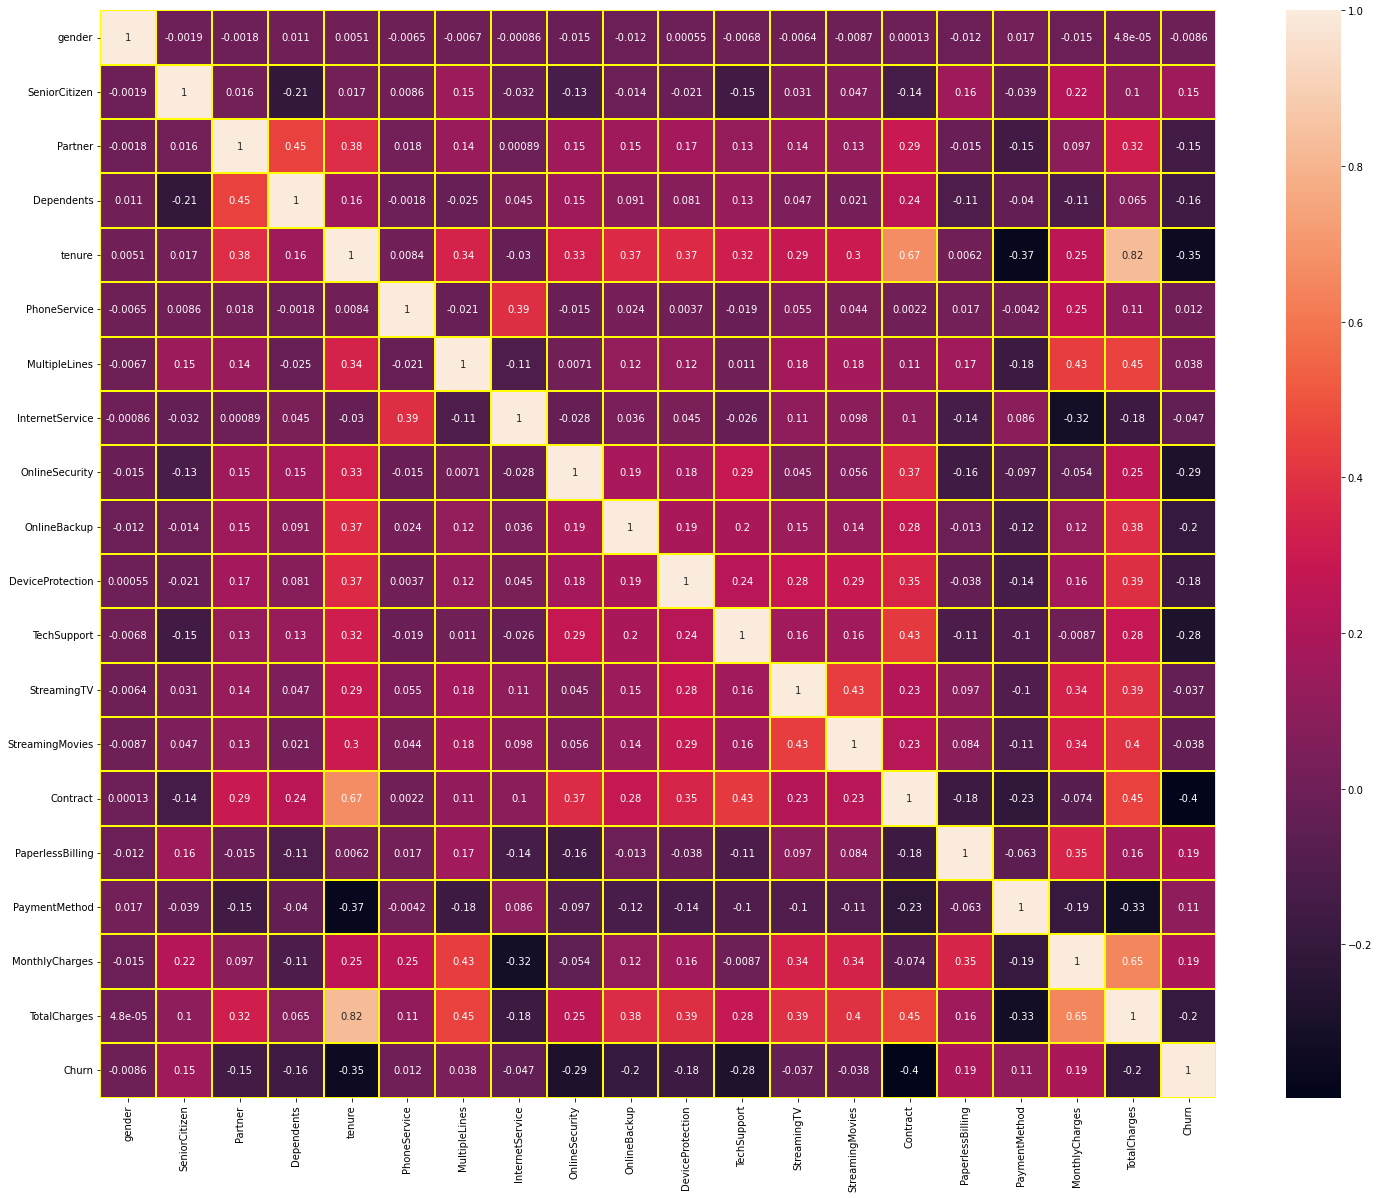

In [187]:
plt.subplots(figsize=(25,20))
sns.heatmap(data.corr(), annot= True, linecolor= "yellow",  linewidths= 2)
plt.show()

# Correlation of Other features with SalePrice(target variable):


<AxesSubplot:title={'center':'feature vs Churn corr'}>

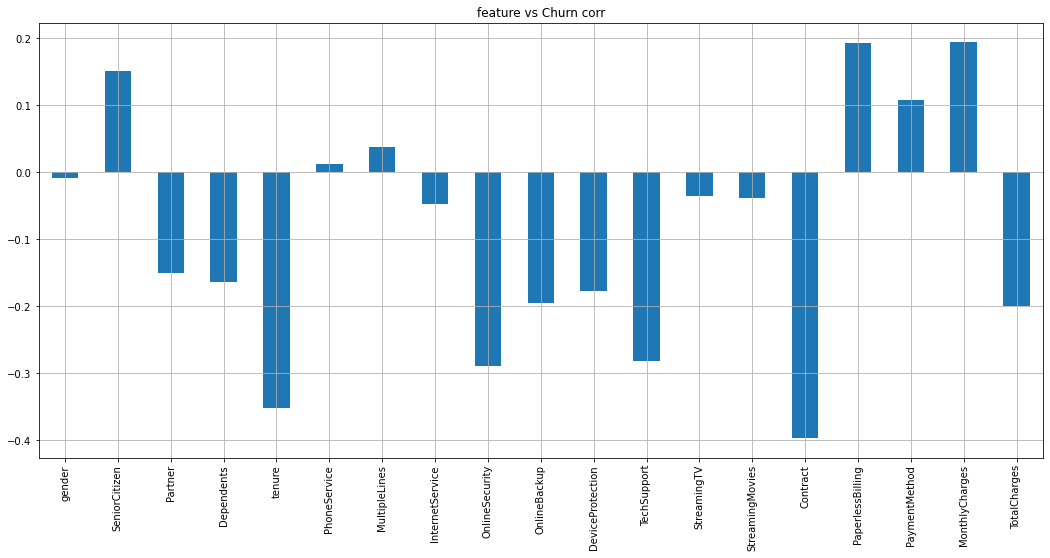

In [189]:
data.drop("Churn",axis=1).corrwith(data["Churn"]).plot(kind='bar',figsize=(18,8),grid='True',title='feature vs Churn corr')

In [190]:
# Observations:

# Churn has a highly negetive relationship with Contract.

# paperless billing and monthly charges are positively correlated with churn.

# All the features are correlated with each other


# Outlier Detection of training data::

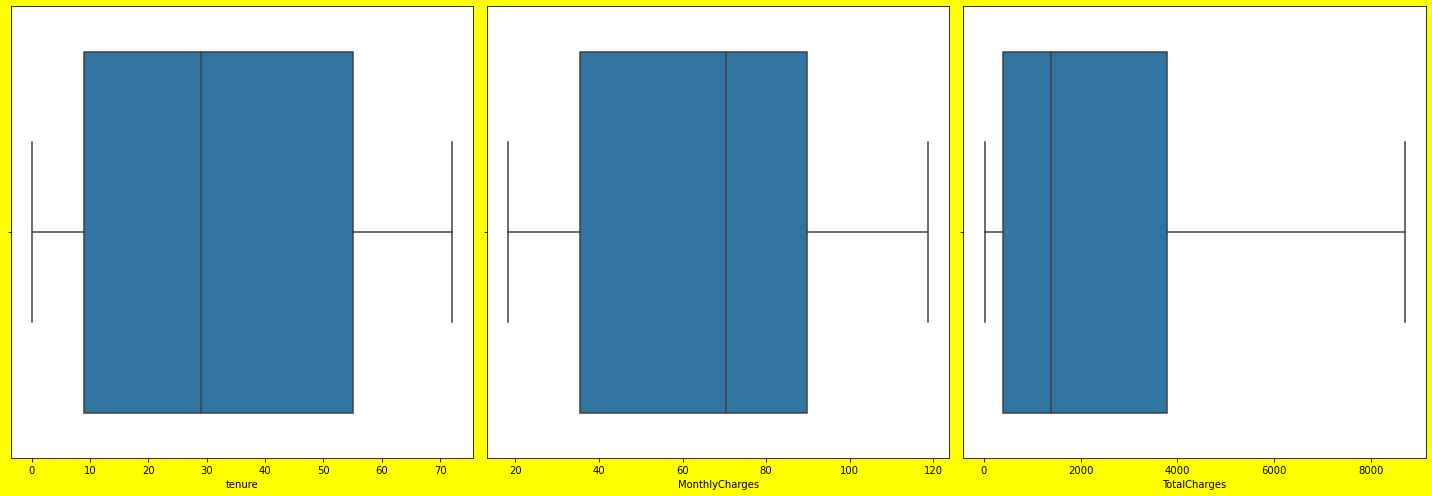

In [191]:
plt.figure(figsize=(20,7),facecolor='yellow')
pltno=1
for x in num_features:
    if pltno<=3:
        ax=plt.subplot(1,3,pltno)
        sns.boxplot(data[x])
    pltno+=1
plt.tight_layout()
plt.show()

In [192]:
num_features

['tenure', 'MonthlyCharges', 'TotalCharges']

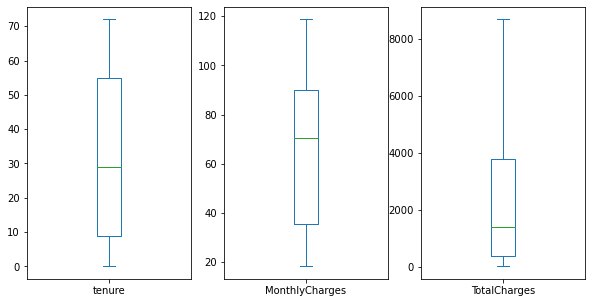

In [193]:
data[['tenure', 'MonthlyCharges', 'TotalCharges']].plot(kind ='box', subplots =True , layout =(1,3), figsize = (10,5))
plt.show()


In [194]:
# Observtations:

# No such outliers are present in the dataset.

# Skewness:

In [195]:
data.skew().sort_values()

PhoneService       -2.727153
PaperlessBilling   -0.375396
MonthlyCharges     -0.220524
PaymentMethod      -0.170129
gender             -0.019031
StreamingMovies     0.014657
StreamingTV         0.028486
Partner             0.067922
MultipleLines       0.118719
OnlineBackup        0.182930
DeviceProtection    0.186847
InternetService     0.205423
tenure              0.239540
TechSupport         0.402365
OnlineSecurity      0.416985
Contract            0.630959
Dependents          0.875199
TotalCharges        0.962394
Churn               1.063031
SeniorCitizen       1.833633
dtype: float64

In [196]:
data[['tenure', 'MonthlyCharges', 'TotalCharges']].skew().sort_values()

MonthlyCharges   -0.220524
tenure            0.239540
TotalCharges      0.962394
dtype: float64

In [197]:
# Observations:

# Except 3 features, all are categorical data. So let's ignore those skewness as we do not remove skewness for categorical data

# Here numarical variable is 'tenure', 'MonthlyCharges', 'TotalCharges' and out of which TotalCharges have some skewness.

#  Let's remove the skewness.

In [198]:
data1= data.copy()

In [199]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')

In [200]:
data[['TotalCharges']] = scaler.fit_transform(data[['TotalCharges']].values)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,-1.810588,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,0.253313,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,-1.387269,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,0.232253,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,-1.250118,1


In [201]:
data[['tenure', 'MonthlyCharges', 'TotalCharges']].skew().sort_values()

MonthlyCharges   -0.220524
TotalCharges     -0.144899
tenure            0.239540
dtype: float64

# Balancing Imbalanced target feature(Churn) using SMOTE:

In [202]:
from imblearn.over_sampling import SMOTE
ovrs = SMOTE()

# Splitting data in target and features
x = data.drop(['Churn'], axis =1)
y = data['Churn']

In [203]:
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [204]:
x,y = ovrs.fit_resample(x,y)
y.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

# Checking Multicollinearity:

In [205]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif= pd.DataFrame()
vif["VIF"]= [variance_inflation_factor(data.values,i)for i in range(data.shape[1])]
vif["Features"] = data.columns
vif

,VIF,Features
0,1.992203,gender
1,1.372640,SeniorCitizen
2,2.821218,Partner
3,1.961200,Dependents
4,13.497891,tenure
5,16.014903,PhoneService
6,2.756853,MultipleLines
7,4.478147,InternetService
8,2.287594,OnlineSecurity
9,2.445350,OnlineBackup


In [206]:
# Observation:

# Multicollinearity present between different features.

# we will remove this after checking PCA

# Principal Component Analysis (PCA) :

In [207]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
pca = PCA()
scaler= StandardScaler()
x_scale = scaler.fit_transform(x)

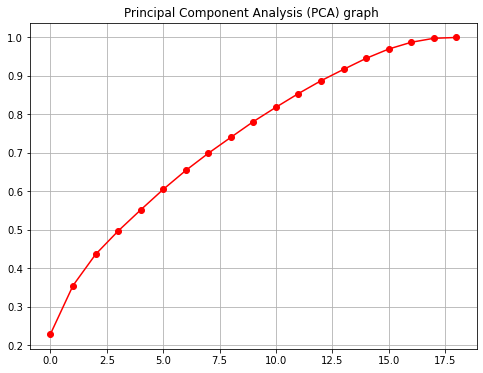

In [208]:
x_pca = pca.fit_transform(x_scale)
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.title('Principal Component Analysis (PCA) graph ')
plt.grid()

In [209]:
# Observations:

# Here , around 95% variance gives the first 14 component. Let's take the first 14 components.

In [210]:
pca_new = PCA(n_components=14)
x_scale_new = pca_new.fit_transform(x_scale)
prin_x=pd.DataFrame(x_scale_new )
prin_x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-2.366966,0.695657,2.818908,0.046614,0.886350,-0.775690,1.201253,1.044527,-2.366529,0.016142,-0.061039,0.103330,0.034684,0.205002
1,-0.523454,1.565170,0.640281,0.668457,0.043584,1.373175,-1.001679,0.378237,1.942561,0.863082,0.195764,1.324677,-1.801188,-1.144130
2,-2.219635,0.854704,0.644951,-0.096037,0.006745,1.389652,-1.326834,2.393539,-0.357680,-0.088684,0.815205,-0.465906,-1.522053,0.244442
3,0.743460,2.248060,3.289415,2.126568,-0.059212,1.320475,-0.604455,-1.514407,0.803995,-0.306664,-0.778054,0.797647,-0.249443,0.900601
4,-2.956240,-0.418257,-0.200585,-0.302719,-0.814054,-0.640734,-0.271409,0.463541,0.013869,-0.711990,-0.279914,0.293114,-0.017093,-0.548747


# Final predictions using different Classification ML Models for Income:

# Find best Random state:

In [212]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

from sklearn.linear_model import LogisticRegression

acc_max=0
random_max=0
for i in range(400, 1500):
    x_train,x_test,y_train,y_test = train_test_split(x_scale_new,y,test_size = 0.25, random_state=i)
    log= LogisticRegression()
    log.fit(x_train,y_train)
    y_pred=log.predict(x_test)
    acc= accuracy_score(y_test,y_pred)
    if acc>acc_max:
        acc_max=acc
        random_max=i
        
print('Best accuracy is', acc_max ,'on Random_state', random_max)

Best accuracy is 0.8005411673753382 on Random_state 1229


# Here the best accuracy on Random_state=1229, Let's take it.

In [213]:
print('Training feature shape:',x_train.shape)
print('Training target shape:',y_train.shape)
print('Test feature shape:',x_test.shape)
print('Test target shape:',y_test.shape)

Training feature shape: (7761, 14)
Training target shape: (7761,)
Test feature shape: (2587, 14)
Test target shape: (2587,)


# Using LogisticRegression():

In [214]:
from sklearn.linear_model import LogisticRegression

x_train,x_test,y_train,y_test = train_test_split(x_scale_new,y,test_size = 0.25, random_state=1261)

log = LogisticRegression()

log.fit(x_train, y_train)

y_pred = log.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print ('cof_mat:\n ', confusion_matrix(y_test, y_pred))
print('classification report:\n ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', log.score(x_train, y_train))
print('testing score : ', log.score(x_test, y_test))


accu score :  0.7881716273676073
cof_mat:
  [[ 980  312]
 [ 236 1059]]
classification report:
                precision    recall  f1-score   support

           0       0.81      0.76      0.78      1292
           1       0.77      0.82      0.79      1295

    accuracy                           0.79      2587
   macro avg       0.79      0.79      0.79      2587
weighted avg       0.79      0.79      0.79      2587

-----------
-----------
training score :  0.7782502254864064
testing score :  0.7881716273676073


# Use GridSearchCV for hyperparameter tuning:

In [215]:
from sklearn.model_selection import GridSearchCV
grid = dict(solver=['newton-cg', 'lbfgs', 'liblinear', 'sag'],penalty=['l2','l1'], C=[1.0, 0.1,0.01,0.001]
           , max_iter=[100, 140, 80])

grid_log = GridSearchCV(estimator=log, param_grid= grid, cv=5 )

grid_log.fit(x_train, y_train)
print('best params : ', grid_log.best_params_)

best params :  {'C': 1.0, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}


In [216]:
grid_log_best = grid_log.best_estimator_
grid_log_best.fit(x_train, y_train)

y_pred = grid_log_best.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print ('cof_mat:\n\n ', confusion_matrix(y_test, y_pred))
print('classification report:\n ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', grid_log_best.score(x_train, y_train))
print('testing score : ', grid_log_best.score(x_test, y_test))

accu score :  0.7881716273676073
cof_mat:

  [[ 980  312]
 [ 236 1059]]
classification report:
                precision    recall  f1-score   support

           0       0.81      0.76      0.78      1292
           1       0.77      0.82      0.79      1295

    accuracy                           0.79      2587
   macro avg       0.79      0.79      0.79      2587
weighted avg       0.79      0.79      0.79      2587

-----------
-----------
training score :  0.7782502254864064
testing score :  0.7881716273676073


In [217]:
# Observations:

# R2 score not improved after using gridsearchCV .



# Using DecisionTreeClassifier()

In [218]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n\n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', clf.score(x_train, y_train))
print('testing score : ', clf.score(x_test, y_test))

accu score :  0.7533822960958639


cof_mat:  [[955 337]
 [301 994]]


classification report: 

               precision    recall  f1-score   support

           0       0.76      0.74      0.75      1292
           1       0.75      0.77      0.76      1295

    accuracy                           0.75      2587
   macro avg       0.75      0.75      0.75      2587
weighted avg       0.75      0.75      0.75      2587

-----------
-----------
training score :  0.9984538074990337
testing score :  0.7533822960958639


# Use GridSearchCV for hyperparameter tuning:

In [219]:
param = {'criterion' : ['gini', 'entropy', 'log_loss'],
    'min_samples_split' : range(1,4), 'splitter': ["best", "random"], 'ccp_alpha': [0.1, .01, .001, 10,1],
        'max_features': ['auto', 'sqrt', 'log2']}

grid_search = GridSearchCV(estimator = clf, cv=5, param_grid = param)

grid_search.fit(x_train, y_train)
print('best params : ', grid_search.best_params_)

best params :  {'ccp_alpha': 0.001, 'criterion': 'entropy', 'max_features': 'sqrt', 'min_samples_split': 3, 'splitter': 'best'}


In [220]:
grid_clf_best = grid_search.best_estimator_
grid_clf_best.fit(x_train, y_train)

y_pred = grid_clf_best.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n\n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', grid_clf_best.score(x_train, y_train))
print('testing score : ', grid_clf_best.score(x_test, y_test))

accu score :  0.7587939698492462


cof_mat:  [[973 319]
 [305 990]]


classification report: 

               precision    recall  f1-score   support

           0       0.76      0.75      0.76      1292
           1       0.76      0.76      0.76      1295

    accuracy                           0.76      2587
   macro avg       0.76      0.76      0.76      2587
weighted avg       0.76      0.76      0.76      2587

-----------
-----------
training score :  0.8089163767555727
testing score :  0.7587939698492462


In [221]:
# Observations:

# Accuracy score is slightly improved after using GridSearchCV with DecisionTreeClassifier().

# The difference between training score, testing score is also decreased.

# Using GradientBoostingClassifier():


In [222]:
from sklearn.ensemble import GradientBoostingClassifier

gbdt= GradientBoostingClassifier()
gbdt.fit(x_train, y_train)

y_pred = gbdt.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n\n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', gbdt.score(x_train, y_train))
print('testing score : ', gbdt.score(x_test, y_test))

accu score :  0.801700811751063


cof_mat:  [[ 995  297]
 [ 216 1079]]


classification report: 

               precision    recall  f1-score   support

           0       0.82      0.77      0.80      1292
           1       0.78      0.83      0.81      1295

    accuracy                           0.80      2587
   macro avg       0.80      0.80      0.80      2587
weighted avg       0.80      0.80      0.80      2587

-----------
-----------
training score :  0.8196108748872568
testing score :  0.801700811751063


# Using Gridsearch CV:

In [223]:
param= {"min_samples_split" : [2,3],"learning_rate": [0.1,0.01,1.0], 
        "min_samples_leaf" :[1,2], "criterion":['friedman_mse', 'squared_error'] }

grid_gbdt= GridSearchCV (gbdt, param_grid= param,cv=5)

grid_gbdt.fit(x_train, y_train)
print('best params : ', grid_gbdt.best_params_)

best params :  {'criterion': 'friedman_mse', 'learning_rate': 0.1, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [224]:
grid_gbdt_best = grid_gbdt.best_estimator_
grid_gbdt_best.fit(x_train, y_train)

y_pred = grid_gbdt_best.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report:\n\n ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', grid_gbdt_best.score(x_train, y_train))
print('testing score : ', grid_gbdt_best.score(x_test, y_test))

accu score :  0.8024739080015462


cof_mat:  [[ 995  297]
 [ 214 1081]]


classification report:

                precision    recall  f1-score   support

           0       0.82      0.77      0.80      1292
           1       0.78      0.83      0.81      1295

    accuracy                           0.80      2587
   macro avg       0.80      0.80      0.80      2587
weighted avg       0.80      0.80      0.80      2587

-----------
-----------
training score :  0.8196108748872568
testing score :  0.8024739080015462


In [225]:
# Observations:

#Accuracy score, training score, testing score are not improved after using GridSearchCV with GradientBoostingClassifier()

# Using RandomForestClassifier()


In [259]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', rf.score(x_train, y_train))
print('testing score : ', rf.score(x_test, y_test))


accu score :  0.8179358330112099


cof_mat:  [[1062  230]
 [ 241 1054]]


classification report:                precision    recall  f1-score   support

           0       0.82      0.82      0.82      1292
           1       0.82      0.81      0.82      1295

    accuracy                           0.82      2587
   macro avg       0.82      0.82      0.82      2587
weighted avg       0.82      0.82      0.82      2587

-----------
-----------
training score :  0.9984538074990337
testing score :  0.8179358330112099


# Use GridSearchCV for hyperparameter tuning:

In [254]:
params = {'n_estimators' : [100,80, 150], 'min_samples_leaf': [1,2,3],
          'criterion' : ["gini", "entropy"]}

rf_grd = GridSearchCV(rf, param_grid = params, cv=5)

rf_grd.fit(x_train, y_train)
print('best params : ', rf_grd.best_params_)

best params :  {'criterion': 'entropy', 'min_samples_leaf': 3, 'n_estimators': 150}


In [258]:
grid_rf_best = rf_grd.best_estimator_

grid_rf_best.fit(x_train, y_train)

y_pred = grid_rf_best.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', grid_rf_best.score(x_train, y_train))
print('testing score : ', grid_rf_best.score(x_test, y_test))

accu score :  0.822574410514109


cof_mat:  [[1048  244]
 [ 215 1080]]


classification report: 
               precision    recall  f1-score   support

           0       0.83      0.81      0.82      1292
           1       0.82      0.83      0.82      1295

    accuracy                           0.82      2587
   macro avg       0.82      0.82      0.82      2587
weighted avg       0.82      0.82      0.82      2587

-----------
-----------
training score :  0.9684319031052699
testing score :  0.822574410514109


In [245]:
# Observations:

# Accuracy score is slightly improved after using GridSearchCV with RandomForestClassifier()



# ExtraTreesClassifier():

In [230]:
from sklearn.ensemble import ExtraTreesClassifier

etc =ExtraTreesClassifier()
etc.fit(x_train, y_train)

y_pred = etc.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', etc.score(x_train, y_train))
print('testing score : ', etc.score(x_test, y_test))

accu score :  0.8167761886354851


cof_mat:  [[1066  226]
 [ 248 1047]]


classification report:                precision    recall  f1-score   support

           0       0.81      0.83      0.82      1292
           1       0.82      0.81      0.82      1295

    accuracy                           0.82      2587
   macro avg       0.82      0.82      0.82      2587
weighted avg       0.82      0.82      0.82      2587

-----------
-----------
training score :  0.9984538074990337
testing score :  0.8167761886354851


# Use GridSearchCV for hyperparameter tuning:

In [260]:
params = {'n_estimators' : [100,80, 150], 'min_samples_leaf': [1,2],
          'criterion' : ["gini", "entropy"]}

etc_grd = GridSearchCV(etc, param_grid = params, cv=5)

etc_grd.fit(x_train, y_train)
print('best params : ', etc_grd.best_params_)

best params :  {'criterion': 'gini', 'min_samples_leaf': 2, 'n_estimators': 150}


In [261]:
grid_etc_best = etc_grd.best_estimator_
grid_etc_best.fit(x_train, y_train)

y_pred = grid_etc_best.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', grid_etc_best.score(x_train, y_train))
print('testing score : ', grid_etc_best.score(x_test, y_test))

accu score :  0.8198685736374178


cof_mat:  [[1057  235]
 [ 231 1064]]


classification report: 
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1292
           1       0.82      0.82      0.82      1295

    accuracy                           0.82      2587
   macro avg       0.82      0.82      0.82      2587
weighted avg       0.82      0.82      0.82      2587

-----------
-----------
training score :  0.9698492462311558
testing score :  0.8198685736374178


In [262]:
# Observations:

# Accuracy score is slightly improved after using GridSearchCV with ExtraTreesClassifier()

# Using AdaBoostClassifier:

In [263]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
ada.fit(x_train, y_train)

y_pred = ada.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', ada.score(x_train, y_train))
print('testing score : ', ada.score(x_test, y_test))

accu score :  0.784692694240433


cof_mat:  [[ 997  295]
 [ 262 1033]]


classification report:                precision    recall  f1-score   support

           0       0.79      0.77      0.78      1292
           1       0.78      0.80      0.79      1295

    accuracy                           0.78      2587
   macro avg       0.78      0.78      0.78      2587
weighted avg       0.78      0.78      0.78      2587

-----------
-----------
training score :  0.7956448911222781
testing score :  0.784692694240433


# Using GridSearchCV for hyperparameter tuning:

In [264]:
params = {'n_estimators' : [50,40, 60], 'learning_rate': [1,0.1,0.01] }

ada_grd = GridSearchCV(ada, param_grid = params, cv=5)

ada_grd.fit(x_train, y_train)
print('best params : ', ada_grd.best_params_)

best params :  {'learning_rate': 1, 'n_estimators': 60}


In [265]:
grid_ada_best = ada_grd.best_estimator_
grid_ada_best.fit(x_train, y_train)

y_pred = grid_ada_best.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', grid_ada_best.score(x_train, y_train))
print('testing score : ', grid_ada_best.score(x_test, y_test))

accu score :  0.7831465017394665


cof_mat:  [[ 973  319]
 [ 242 1053]]


classification report: 
               precision    recall  f1-score   support

           0       0.80      0.75      0.78      1292
           1       0.77      0.81      0.79      1295

    accuracy                           0.78      2587
   macro avg       0.78      0.78      0.78      2587
weighted avg       0.78      0.78      0.78      2587

-----------
-----------
training score :  0.795387192372117
testing score :  0.7831465017394665


In [266]:
# Observations:

# Accuracy score is not improved after using GridSearchCV with AdaBoostClassifier().

# Using SVC('rbf'):

In [267]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

def svmkernel(ker):
    #svc = SVC(kernel = ker )
    pipe = Pipeline([('PCA', PCA()),
                ('SVM', SVC(C=7, gamma=0.01, kernel = ker))])
    
    pipe.fit(x_train, y_train)
    pipe.score(x_train, y_train)
    predsvc = pipe.predict(x_test)
    print('accu score : ', accuracy_score(y_test, predsvc))
    print("\n")
    print ('cof_mat: ', confusion_matrix(y_test, predsvc))
    print("\n")
    print('classification report: \n\n', classification_report(y_test, predsvc))
    
    print("-----------")
    print("-----------")
    
    
    print('training score : ', pipe.score(x_train, y_train))
    print('testing score : ', pipe.score(x_test, y_test))

In [268]:
svmkernel('rbf')

accu score :  0.8090452261306532


cof_mat:  [[ 994  298]
 [ 196 1099]]


classification report: 

               precision    recall  f1-score   support

           0       0.84      0.77      0.80      1292
           1       0.79      0.85      0.82      1295

    accuracy                           0.81      2587
   macro avg       0.81      0.81      0.81      2587
weighted avg       0.81      0.81      0.81      2587

-----------
-----------
training score :  0.803891251127432
testing score :  0.8090452261306532


# Using SVC ('linear'):

In [269]:
svmkernel('linear')

accu score :  0.7858523386161577


cof_mat:  [[ 970  322]
 [ 232 1063]]


classification report: 

               precision    recall  f1-score   support

           0       0.81      0.75      0.78      1292
           1       0.77      0.82      0.79      1295

    accuracy                           0.79      2587
   macro avg       0.79      0.79      0.79      2587
weighted avg       0.79      0.79      0.79      2587

-----------
-----------
training score :  0.7742558948589099
testing score :  0.7858523386161577


# Using SVC ('poly'):

In [270]:
svmkernel('poly')

accu score :  0.7781213761113258


cof_mat:  [[ 881  411]
 [ 163 1132]]


classification report: 

               precision    recall  f1-score   support

           0       0.84      0.68      0.75      1292
           1       0.73      0.87      0.80      1295

    accuracy                           0.78      2587
   macro avg       0.79      0.78      0.78      2587
weighted avg       0.79      0.78      0.78      2587

-----------
-----------
training score :  0.7675557273547223
testing score :  0.7781213761113258


# RandomforestClassifier() gives best accuracy.



# Cross Validtion:

In [271]:
from sklearn.model_selection import cross_val_score
svm_best = Pipeline([('PCA', PCA()),
                ('SVM', SVC(C=7, gamma=0.01, kernel = "rbf"))])

all_models = [log, grid_clf_best, grid_gbdt_best, grid_rf_best, grid_etc_best, grid_ada_best, svm_best ]

for i in all_models:
    cvscore = cross_val_score(i, x_scale,y, cv =7)
    print('Cross Validation Score of :',i)
    print("\n Cross Validation Score : " ,cvscore)
    print("\nMean CV Score :",cvscore.mean())
    print("\nStd deviation :",cvscore.std())
    print("\n-----------")
    print("-----------")

Cross Validation Score of : LogisticRegression()

 Cross Validation Score :  [0.75388776 0.75185936 0.77875507 0.79228687 0.79837618 0.81461434
 0.81799729]

Mean CV Score : 0.786825270913741

Std deviation : 0.024726511081960376

-----------
-----------
Cross Validation Score of : DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy',
                       max_features='sqrt', min_samples_split=3)

 Cross Validation Score :  [0.7525355  0.72008114 0.78078484 0.80717185 0.80581867 0.83220568
 0.81867388]

Mean CV Score : 0.7881816531381346

Std deviation : 0.03684450968756157

-----------
-----------
Cross Validation Score of : GradientBoostingClassifier()

 Cross Validation Score :  [0.76335362 0.75388776 0.80649526 0.83626522 0.84032476 0.85656292
 0.864682  ]

Mean CV Score : 0.8173673650319631

Std deviation : 0.0409258657236022

-----------
-----------
Cross Validation Score of : RandomForestClassifier(criterion='entropy', min_samples_leaf=3,
                       n_estima

# Observations:

# Among 7 classification models RandomforestClassifier() gives good accuracy and maximum f1 score along with a good Cross-validation score.

# Let's plot AUC-ROC Curve.

In [272]:
# Plotting ROC AUC Curve to choose best model

In [273]:
log.fit(x_train, y_train)
grid_clf_best.fit(x_train, y_train)
grid_gbdt_best.fit(x_train, y_train)
grid_rf_best.fit(x_train, y_train)
grid_etc_best.fit(x_train, y_train)
grid_ada_best.fit(x_train, y_train)
svm_best.fit(x_train, y_train)
print ("All model are trained")

All model are trained


In [274]:
log.fit(x_test, y_test)
grid_clf_best.fit(x_test, y_test)
grid_gbdt_best.fit(x_test, y_test)
grid_rf_best.fit(x_test, y_test)
grid_etc_best.fit(x_test, y_test)
grid_ada_best.fit(x_test, y_test)
svm_best.fit(x_test, y_test)
print ("All model are tested")

All model are tested


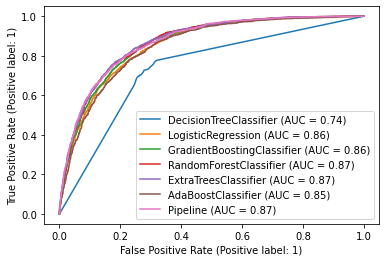

In [275]:
from sklearn.metrics import plot_roc_curve

disp = plot_roc_curve(grid_clf_best, x_train, y_train)

plot_roc_curve(log, x_train, y_train, ax=disp.ax_)
plot_roc_curve(grid_gbdt_best, x_train, y_train, ax=disp.ax_)
plot_roc_curve(grid_rf_best, x_train, y_train, ax=disp.ax_)
plot_roc_curve(grid_etc_best, x_train, y_train, ax=disp.ax_)
plot_roc_curve(grid_ada_best, x_train, y_train, ax=disp.ax_)
plot_roc_curve(svm_best, x_train, y_train, ax=disp.ax_)

plt.legend(prop = {'size':10}, loc='lower right')
plt.show()

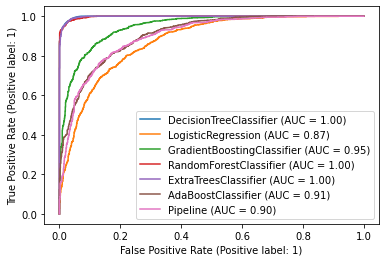

In [276]:
from sklearn.metrics import plot_roc_curve

disp = plot_roc_curve(grid_clf_best, x_test, y_test)

plot_roc_curve(log, x_test, y_test, ax=disp.ax_)
plot_roc_curve(grid_gbdt_best, x_test, y_test, ax=disp.ax_)
plot_roc_curve(grid_rf_best,x_test, y_test, ax=disp.ax_)
plot_roc_curve(grid_etc_best, x_test, y_test, ax=disp.ax_)
plot_roc_curve(grid_ada_best, x_test, y_test, ax=disp.ax_)
plot_roc_curve(svm_best,x_test, y_test, ax=disp.ax_)

plt.legend(prop = {'size':10}, loc='lower right')
plt.show()

In [277]:
# Observations:

# Here Randomforest gives best AUC score. So it is the final model for this dataset.

In [279]:
grid_rf_best.fit(x_train, y_train)
y_pred = grid_rf_best.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', grid_rf_best.score(x_train, y_train))
print('testing score : ', grid_rf_best.score(x_test, y_test))

accu score :  0.822574410514109


cof_mat:  [[1047  245]
 [ 214 1081]]


classification report: 
               precision    recall  f1-score   support

           0       0.83      0.81      0.82      1292
           1       0.82      0.83      0.82      1295

    accuracy                           0.82      2587
   macro avg       0.82      0.82      0.82      2587
weighted avg       0.82      0.82      0.82      2587

-----------
-----------
training score :  0.968689601855431
testing score :  0.822574410514109


# confusion matrix

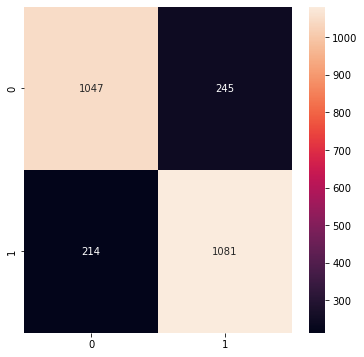

In [280]:
conf = confusion_matrix (y_test, y_pred)

fig , ax = plt.subplots(figsize=(6,6))
sns.heatmap(conf, annot = True, fmt = ".0f")
plt.show()

In [281]:
import pickle
pickle.dump(grid_etc_best, open("Customer_Churn_Classification_model", "wb"))
load_Customer_Churn_Classification_model= pickle.load(open("Customer_Churn_Classification_model", "rb"))

In [282]:
y_pred = load_Customer_Churn_Classification_model.predict(x_test)

y_test = np.array(y_test)
data_prediction_by_model = pd.DataFrame()
data_prediction_by_model["Predicted Values"] = y_pred
data_prediction_by_model["Actual Values"] = y_test
data_prediction_by_model.sample(n=6)

,Predicted Values,Actual Values
313,0,0
576,0,0
1093,0,0
720,0,0
22,0,0
2485,1,1


# Feature importance:

In [283]:
feature= x.columns

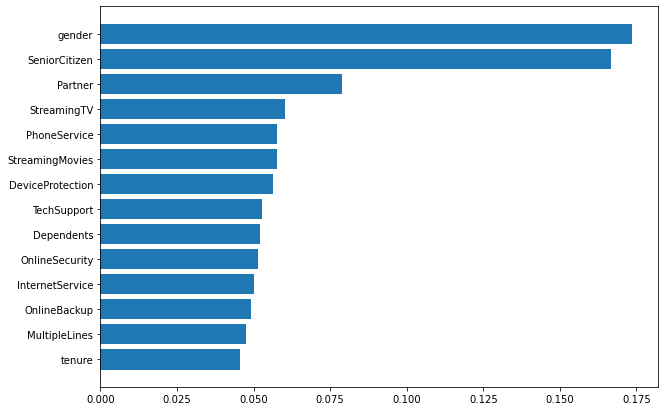

In [284]:
fimp = list(zip(feature,grid_rf_best.feature_importances_))
fimp.sort(key = lambda x : x[1])
plt.figure(figsize=(10,7))
plt.barh([x[0] for x in fimp],[x[1] for x in fimp])

plt.show()

# Gender is the most importance feature amomg all for this dataset.